In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"largest_companies.csv", encoding='utf8')
df.head()

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Apple,AAPL,2801388224512,171.66,United States
1,2,Microsoft,MSFT,2256182968320,300.95,United States
2,3,Saudi Aramco,2222.SR,1973864961187,9.88,Saudi Arabia
3,4,Alphabet (Google),GOOG,1838538817536,2778.76,United States
4,5,Amazon,AMZN,1607290585088,3158.71,United States


In [3]:
# How many countries are in this list?
# How many companies located in United Kingdom?

In [4]:
# answer

df.value_counts("country").count()

68

In [5]:
# solution

df["country"].nunique()

68

In [6]:
# answer 

counties = df.value_counts("country")
counties["United Kingdom"]

108

In [7]:
# solution 1 - groupby

df.groupby("country")["Name"].count()["United Kingdom"]

108

In [8]:
# solution 2 - conditional statement

df[df["country"]=="United Kingdom"].count().iloc[0]

108

In [9]:
# query with @

c = "United Kingdom"
df.query ("country in @c"). count().iloc[0]

108

In [10]:
# query with ''

df.query("country in 'United Kingdom'").count().iloc[0]

108

In [11]:
# query with list

countries_list = ["United Kingdom", "Japan"]
df.query("country in @countries_list").count().iloc[0]

332

In [12]:
# What is the market cap of all companies in UK

In [13]:
df["marketcap"] = df["marketcap"]/1000000000000
df["marketcap"] = df["marketcap"].round(2)

In [14]:
# answer 1 - conditional statement

df[df["country"]=="United Kingdom"]["marketcap"].sum()

2.5100000000000002

In [16]:
# answer 2 - groupby

marketcap_by_country = df.groupby("country")["marketcap"].sum()
marketcap_by_country["United Kingdom"]

2.51

In [17]:
# Which company has Symbol NSRGY, get the Company name and Country of origin and price.

In [18]:
# answer 1 - conditional statement

df[df["Symbol"] == "NSRGY"][["Name", "country", "price (USD)"]]

,Name,country,price (USD)
23,Nestlé,Switzerland,128.77


In [46]:
# answer 2 - query

s = "NSRGY"
df.query("Symbol == @s")

,Rank,Name,Symbol,marketcap,price (USD),country
23,24,Nestlé,NSRGY,0.36,128.77,Switzerland


In [60]:
# How many companies have stock price less than $100

In [58]:
# answer 1 - conditional statement

df[df["price (USD)"] < 100].count().iloc[0]

5130

In [78]:
# answer 2 - query

df.query("`price (USD)` < 100").count().iloc[0]

5130

In [112]:
# Plot top 5 countries by market cap as a pie chart

In [136]:
# answer with series

top_5 = df.groupby("country")["marketcap"].sum().nlargest(5)
top_5

country
United States    46.13
China             7.14
Japan             4.36
France            2.85
India             2.79
Name: marketcap, dtype: float64

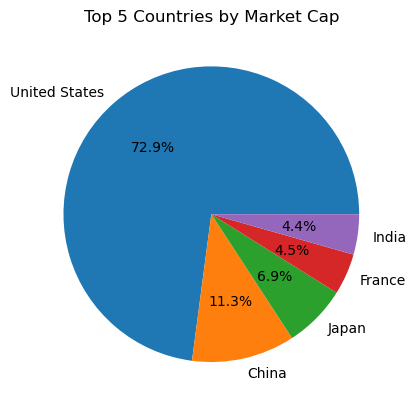

In [138]:
plt.pie(x = top_5.values, labels = top_5.index, autopct = "%1.1f%%")
plt.title("Top 5 Countries by Market Cap")
plt.show()

In [140]:
# solution with dataframe

top_5 = df.groupby("country")[["marketcap"]].sum().nlargest(5, "marketcap")
top_5.reset_index(inplace=True)
top_5

,country,marketcap
0,United States,46.13
1,China,7.14
2,Japan,4.36
3,France,2.85
4,India,2.79


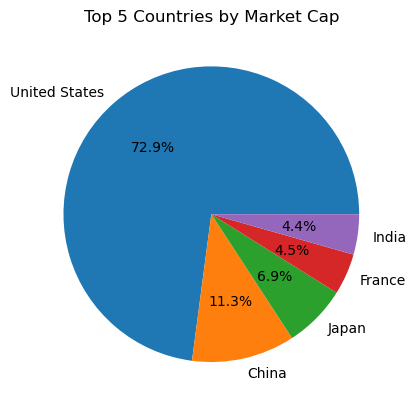

In [142]:
plt.pie(x = top_5["marketcap"], labels = top_5["country"], autopct = "%1.1f%%")
plt.title("Top 5 Countries by Market Cap")
plt.show()